<a href="https://colab.research.google.com/github/saakeeth/c-/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


Data set

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#deleting unnecessary column (Id)
ds=ds.drop(columns=['Id'])
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Displaying statistics of the data

In [4]:
ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#information about the datatypes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Displaying no. of samples on each class

In [6]:
ds['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

so for each class we have 50 samples

**Preprocessing the dataset**

In [7]:
#checking the null values
ds.isnull().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]>

as all are false we do not have any null values

**Histograms**

<Axes: >

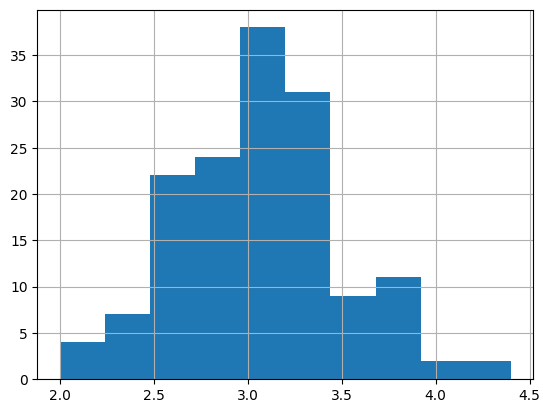

In [8]:
#Visualizing data using  matplotlib.pyplot function
ds['SepalWidthCm'].hist()

*   The above curve is in the form of normal distribution
*   The model can quickly learn from the data






<Axes: >

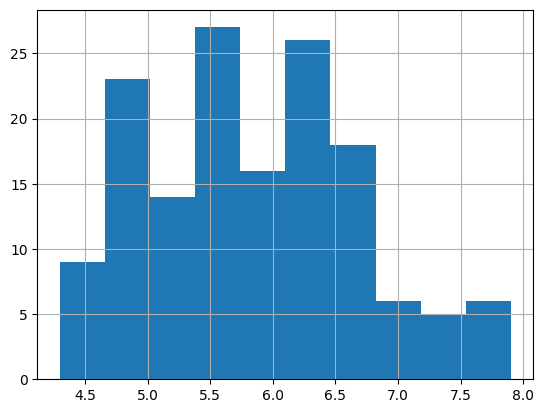

In [9]:
ds['SepalLengthCm'].hist()

<Axes: >

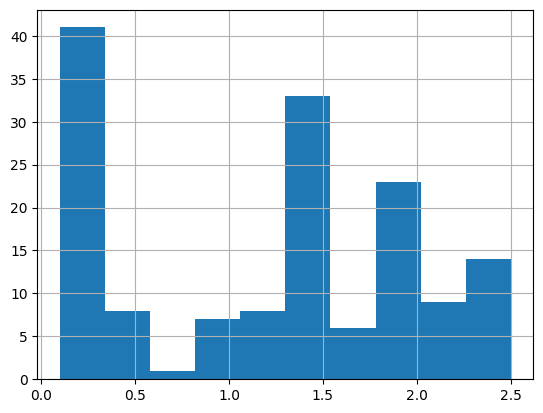

In [10]:
ds['PetalWidthCm'].hist()

<Axes: >

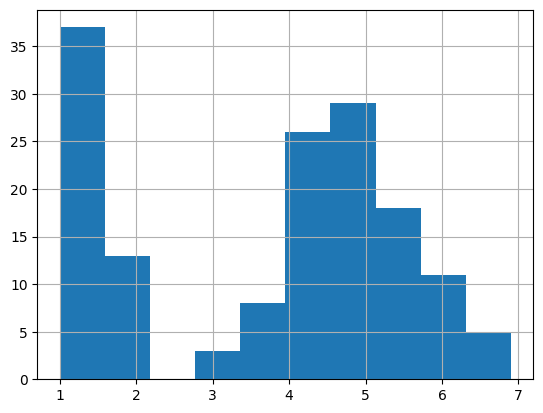

In [11]:
ds['PetalLengthCm'].hist()



*   In the above data there are 2 classes merged together





**Scatterplot**

In [12]:
color=['red','blue','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

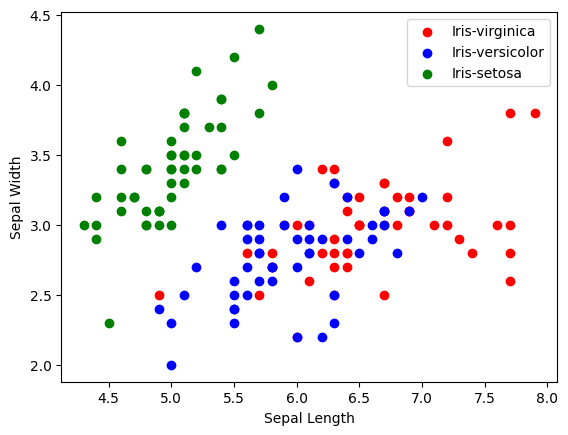

In [13]:
for i in range(3):
  x=ds[ds['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=color[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()    #gives the color identity of each class


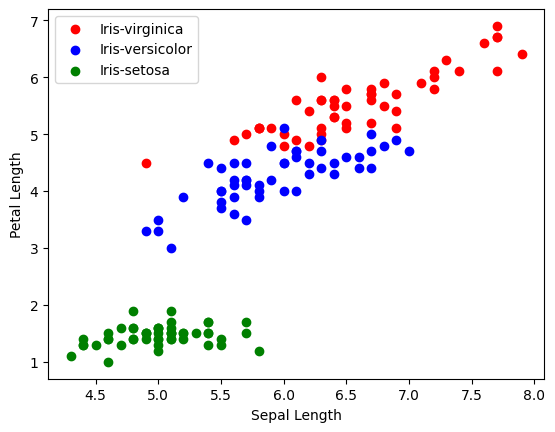

In [14]:
for i in range(3):
  x=ds[ds['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=color[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

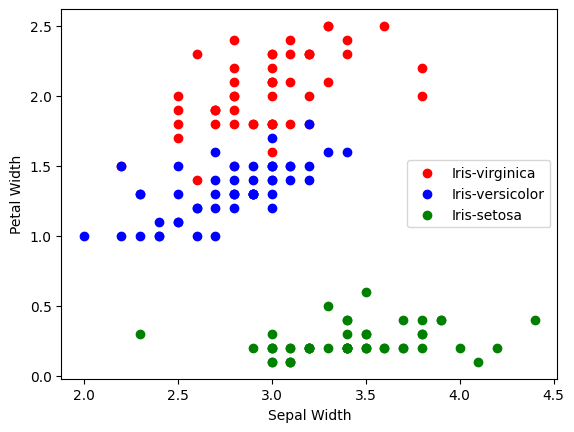

In [15]:
for i in range(3):
  x=ds[ds['Species'] == species[i]]
  #ds['Species'] refers to the 'Species' column of the DataFrame ds. The condition ds['Species'] == species[i] checks whether each value in the 'Species' column is equal to species[i]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=color[i],label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

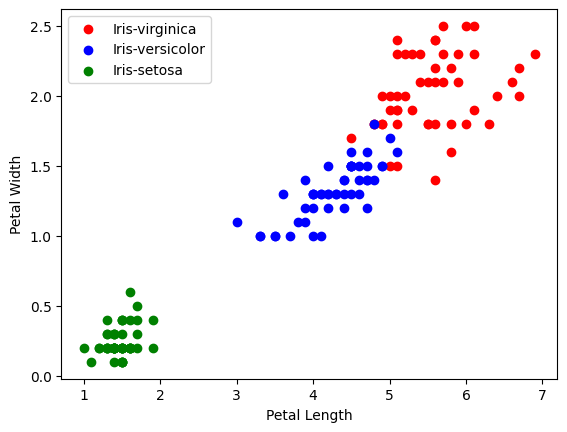

In [16]:
for i in range(3):
  x=ds[ds['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=color[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

**Correlation matrix**


*    A correlation matrix is a square matrix used in data science to display correlation coefficients between variables.

*  Each row and column in the matrix represents a variable in the
dataset.


*   The correlation coefficient ranges from -1 to 1.
*   If 2 variables have high correlation, we can neglect one variable from those two.





In [17]:
ds.corr()

<ipython-input-17-31b754434382>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-18-87dcc6034e8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=ds.corr()


<Axes: >

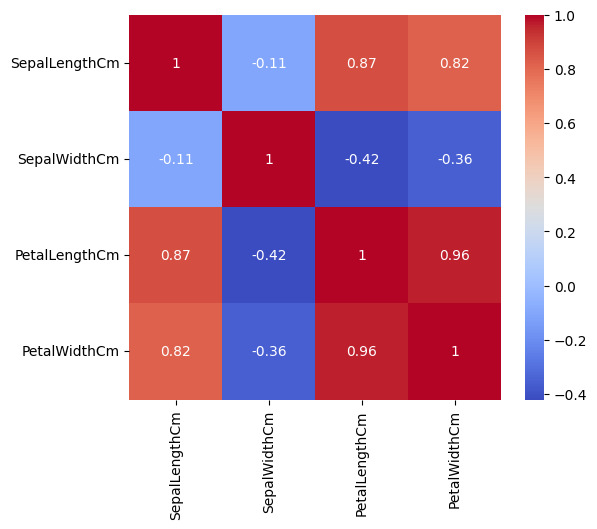

In [18]:
corr=ds.corr()
#lets set the size of the matrix
fig,ax=plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')



*   We can neglect some of the variables higher correlation values in case of many variables
*   For Ex : 0.96 is a higher correlation value

*   While high correlations may warrant further investigation, it is not advisable to automatically neglect variables solely based on their correlation coefficients.






**Label Encoder**


*   A label encoder is a type of encoding technique commonly used in machine learning and data preprocessing tasks.
*    It is used to convert categorical variables or labels into numerical representations, allowing algorithms to process the data more effectively.



In [19]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [20]:
ds['Species']=l.fit_transform(ds['Species'])  # fits the encoder to the unique categories in the column and transforms those categories into numerical labels.
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Training**


*   train_test_split function is commonly used in machine learning to split a dataset into training and testing subsets.
*    test_size=0.2, it means that 20% of the data will be allocated for testing, and the remaining 80% will be used for training.




In [21]:
from sklearn.model_selection import train_test_split
X=ds.drop(columns=['Species'])
Y=ds['Species']
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.30)
#y is the output data
#x is the input data

**Logistic regression**


*   Binary Classification: Logistic regression is primarily used for binary classification problems where the outcome variable is binary (e.g., yes/no, 0/1).
*   It models the probability of an instance belonging to a particular class.


In [22]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
#model training
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
#Printing Metric to get performance
print("Accuracy: ",(model.score(x_test,y_test)*100),"%")

Accuracy:  100.0 %




*   the model will make predictions on the test set based on the provided features (x_test), and then the accuracy score will be calculated by comparing these predictions with the actual labels (y_test).




In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [26]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
#Printing Metric to get performance
print("Accuracy: ",(model.score(x_test,y_test)*100),"%")

Accuracy:  100.0 %


In [28]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
print("Accuracy: ",(model.score(x_test,y_test)*100),"%")

Accuracy:  100.0 %
